In [3]:
#Import modules required to perform data cleaning
import pandas as pd
import numpy as np
from pathlib import Path

#Reading the raw data
raw_file = 'heart_attack_prediction_indonesia.csv'
df = pd.read_csv(raw_file)
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,ekg_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [5]:
#Getting info on the columns present in the dataset
df.info()

#Initial look into data via a numerical summary
df.describe(include='all').T.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,158355.0,NaN,NaN,NaN,54.543778,11.910897,25.0,46.0,55.0,63.0,90.0
gender,158355,2,Male,82243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,158355,2,Urban,103038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_level,158355,3,Middle,71230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hypertension,158355.0,NaN,NaN,NaN,0.299069,0.457851,0.0,0.0,0.0,1.0,1.0
diabetes,158355.0,NaN,NaN,NaN,0.199804,0.399854,0.0,0.0,0.0,0.0,1.0
cholesterol_level,158355.0,NaN,NaN,NaN,199.533264,39.737565,100.0,172.0,199.0,226.0,350.0
obesity,158355.0,NaN,NaN,NaN,0.249901,0.432957,0.0,0.0,0.0,0.0,1.0
waist_circumference,158355.0,NaN,NaN,NaN,93.268504,16.382205,20.0,82.0,93.0,104.0,173.0
family_history,158355.0,NaN,NaN,NaN,0.300218,0.458354,0.0,0.0,0.0,1.0,1.0


In [7]:
# 1) Trim columns, standardise names
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace('[^a-z0-9_]+','_', regex=True))

# 2) Handle missing values (example)
num_cols = df.select_dtypes(include=['float64','int64']).columns
for c in num_cols:
    df[c] = df[c].replace([np.inf, -np.inf], np.nan)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# 3) Categorical normalisation (example)
if 'alcohol_consumption' in df.columns:
    df['alcohol_consumption'] = (df['alcohol_consumption'].astype(str).str.strip().str.lower()
                 .replace({' ': 'None', 'nan': 'None'}))

if 'sleep_hours' in df.columns:
    df['sleep_hours'] = pd.to_numeric(df['sleep_hours'], errors='coerce').round(2)

# 4) Range sanity checks (example)
if 'age' in df.columns:
    df = df[(df['age'] >= 18) & (df['age'] <= 100)]

# 5) Save cleaned
out_file = 'heart_attack_prediction_indonesia_cleaned.csv'
df.to_csv(out_file, index=False)
out_file

'heart_attack_prediction_indonesia_cleaned.csv'

In [9]:
# Waist circumference (to identify 75th percentile)
waist_min = df['waist_circumference'].min()
waist_max = df['waist_circumference'].max()
print(f"Waist circumference: min = {waist_min}, max = {waist_max}")

# Cholesterol level (to identify 75th percentile)
chol_min = df['cholesterol_level'].min()
chol_max = df['cholesterol_level'].max()
print(f"Cholesterol level: min = {chol_min}, max = {chol_max}")

Waist circumference: min = 20, max = 173
Cholesterol level: min = 100, max = 350


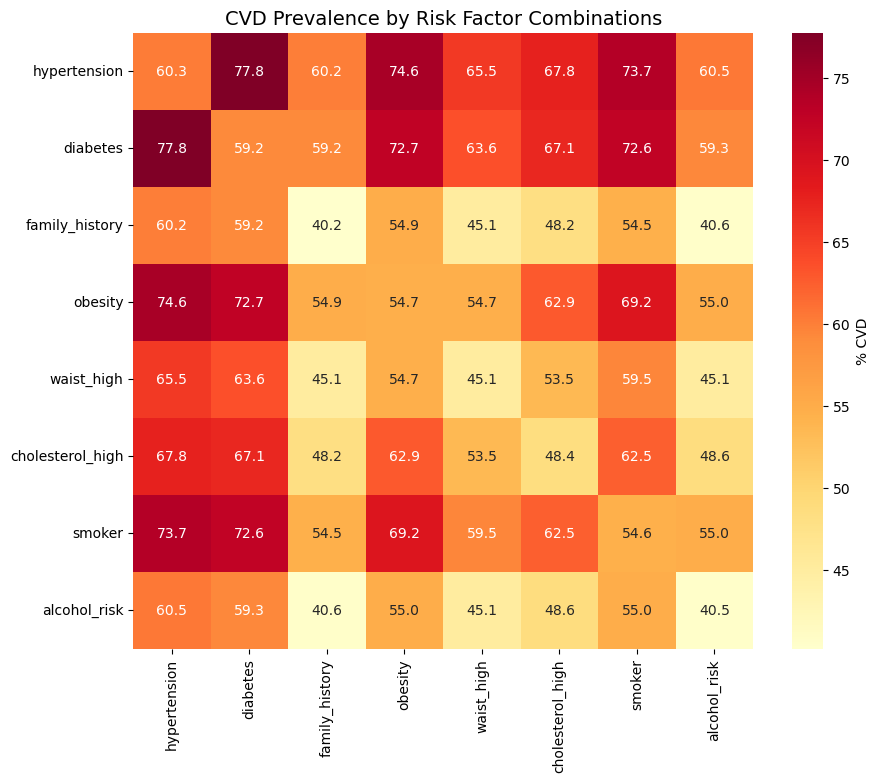

                  hypertension  diabetes  family_history  obesity  waist_high  \
hypertension           47359.0    9424.0         14231.0  11758.0     12571.0   
diabetes                9424.0   31640.0          9466.0   7954.0      8268.0   
family_history         14231.0    9466.0         47541.0  11925.0     12591.0   
obesity                11758.0    7954.0         11925.0  39573.0     20791.0   
waist_high             12571.0    8268.0         12591.0  20791.0     41767.0   
cholesterol_high       12318.0    8128.0         12162.0  10083.0     10651.0   
smoker                 11889.0    7897.0         12039.0   9902.0     10515.0   
alcohol_risk           19132.0   12733.0         19072.0  15952.0     16832.0   

                  cholesterol_high   smoker  alcohol_risk  
hypertension               12318.0  11889.0       19132.0  
diabetes                    8128.0   7897.0       12733.0  
family_history             12162.0  12039.0       19072.0  
obesity                    100

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Load cleaned dataset
df = pd.read_csv("heart_attack_prediction_indonesia_cleaned.csv") 
df_risk = df.copy()

# Binary variables 
binary_vars = ['hypertension', 'diabetes', 'family_history', 'obesity']

# Numeric variables: binarize using 75th percentile
waist_threshold = df['waist_circumference'].quantile(0.75)
df_risk['waist_high'] = df_risk['waist_circumference'].apply(lambda x: 1 if x >= waist_threshold else 0)
chol_threshold = df['cholesterol_level'].quantile(0.75)
df_risk['cholesterol_high'] = df_risk['cholesterol_level'].apply(lambda x: 1 if x >= chol_threshold else 0)

# Categorical variables
df_risk['smoker'] = df_risk['smoking_status'].apply(lambda x: 1 if isinstance(x, str) and x.lower() == 'current' else 0)
df_risk['alcohol_risk'] = df_risk['alcohol_consumption'].apply(lambda x: 1 if isinstance(x, str) and x.lower() in ['moderate','high'] else 0)

# List of all risk factors to include
risk_columns = binary_vars + ['waist_high','cholesterol_high','smoker','alcohol_risk']

# Create empty dataframe for heatmap
heatmap_data = pd.DataFrame(index=risk_columns, columns=risk_columns, dtype=float)

# Pairwise CVD prevalence
for rf1, rf2 in combinations(risk_columns, 2):
    subset = df_risk[(df_risk[rf1]==1) & (df_risk[rf2]==1)]
    prevalence = subset['heart_attack'].mean() * 100 if len(subset) > 0 else 0
    heatmap_data.loc[rf1, rf2] = prevalence
    heatmap_data.loc[rf2, rf1] = prevalence

# Diagonal = single-factor prevalence
for rf in risk_columns:
    heatmap_data.loc[rf, rf] = df_risk[df_risk[rf]==1]['heart_attack'].mean() * 100

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label':'% CVD'})
plt.title('CVD Prevalence by Risk Factor Combinations', fontsize=14)
plt.show()
count_data = pd.DataFrame(index=risk_columns, columns=risk_columns, dtype=float)

for rf1, rf2 in combinations(risk_columns, 2):
    subset = df_risk[(df_risk[rf1]==1) & (df_risk[rf2]==1)]
    count_data.loc[rf1, rf2] = len(subset)
    count_data.loc[rf2, rf1] = len(subset)

for rf in risk_columns:
    count_data.loc[rf, rf] = df_risk[df_risk[rf]==1].shape[0]

print(count_data)